In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X = energy_efficiency.data.features 
y = energy_efficiency.data.targets 
  
X.describe()

,X1,X2,X3,X4,X5,X6,X7,X8
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000


In [5]:
y = y.drop("Y1", axis=1)
y.head()

new_X = X.drop_duplicates(subset="X2")
print(new_X["X2"])

0     514.5
4     563.5
8     588.0
12    612.5
16    637.0
20    661.5
24    686.0
28    710.5
32    735.0
36    759.5
40    784.0
44    808.5
Name: X2, dtype: float64


In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)
# print(X_train, type(X_train))

reg = LinearRegression().fit(X_train, y_train)
print(r2_score(y_test, reg.predict(X_test)))
test_df = pd.DataFrame()
test_df["actual"] = y_test
test_df["pred"] = reg.predict(X_test)
test_df.head(10)

0.8932269811749011


,actual,pred
668,16.90,19.754929
324,16.39,16.771320
624,32.78,32.024928
690,46.23,36.702527
473,19.76,17.276863
204,24.61,31.096276
97,25.63,27.610129
336,29.62,29.773056
568,22.72,19.338575
148,34.14,29.927040


In [7]:
def pred_model(model, model_name, X_train, y_train, X_test, y_test):
    print(model_name)

    model.fit(X_train, y_train)

    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test, y_pred_test)

    print("R2 : ", round(R2_test_model, 4))

    # plt.xlim((10, 50))
    # plt.ylim((10, 50))
    # plt.scatter(x=y_test, y=y_pred_test, marker="v", s=20)
    # plt.xlabel("y_test")
    # plt.ylabel("y_pred")

    # lims = [
    #     np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    #     np.max([plt.xlim(), plt.ylim()]),  # max of both axes
    # ]

    # plt.plot(lims, lims, color='red', linestyle='--')
    # plt.grid(color="green", linestyle="--", linewidth=0.5)

    fig, axs = plt.subplots(
        nrows=2,
        ncols=1,
        figsize=(8, 8),
        dpi=400,
    )

    # axs[0].set_aspect('equal', adjustable='box')
    axs[0].scatter(x=y_test, y=y_pred_test, marker="v", s=20)
    axs[0].set_xlim((10, 50))
    axs[0].set_ylim((10, 50))
    axs[0].set_xlabel("actual")
    axs[0].set_ylabel("predicted")
    axs[0].plot([10, 50], [10, 50], color='red', linestyle='--')
    axs[0].grid(color="green", linestyle="--", linewidth=0.5)
    
    
    # axs[1].scatter(x=X_test["X2"], y=y_test)
    # X_new = X_test.sort_values(by="X2").drop_duplicates(subset="X2")
    # axs[1].plot(X_new["X2"], model.predict(X_new))
    

    plt.show()


LinearRegression
R2 :  0.8932


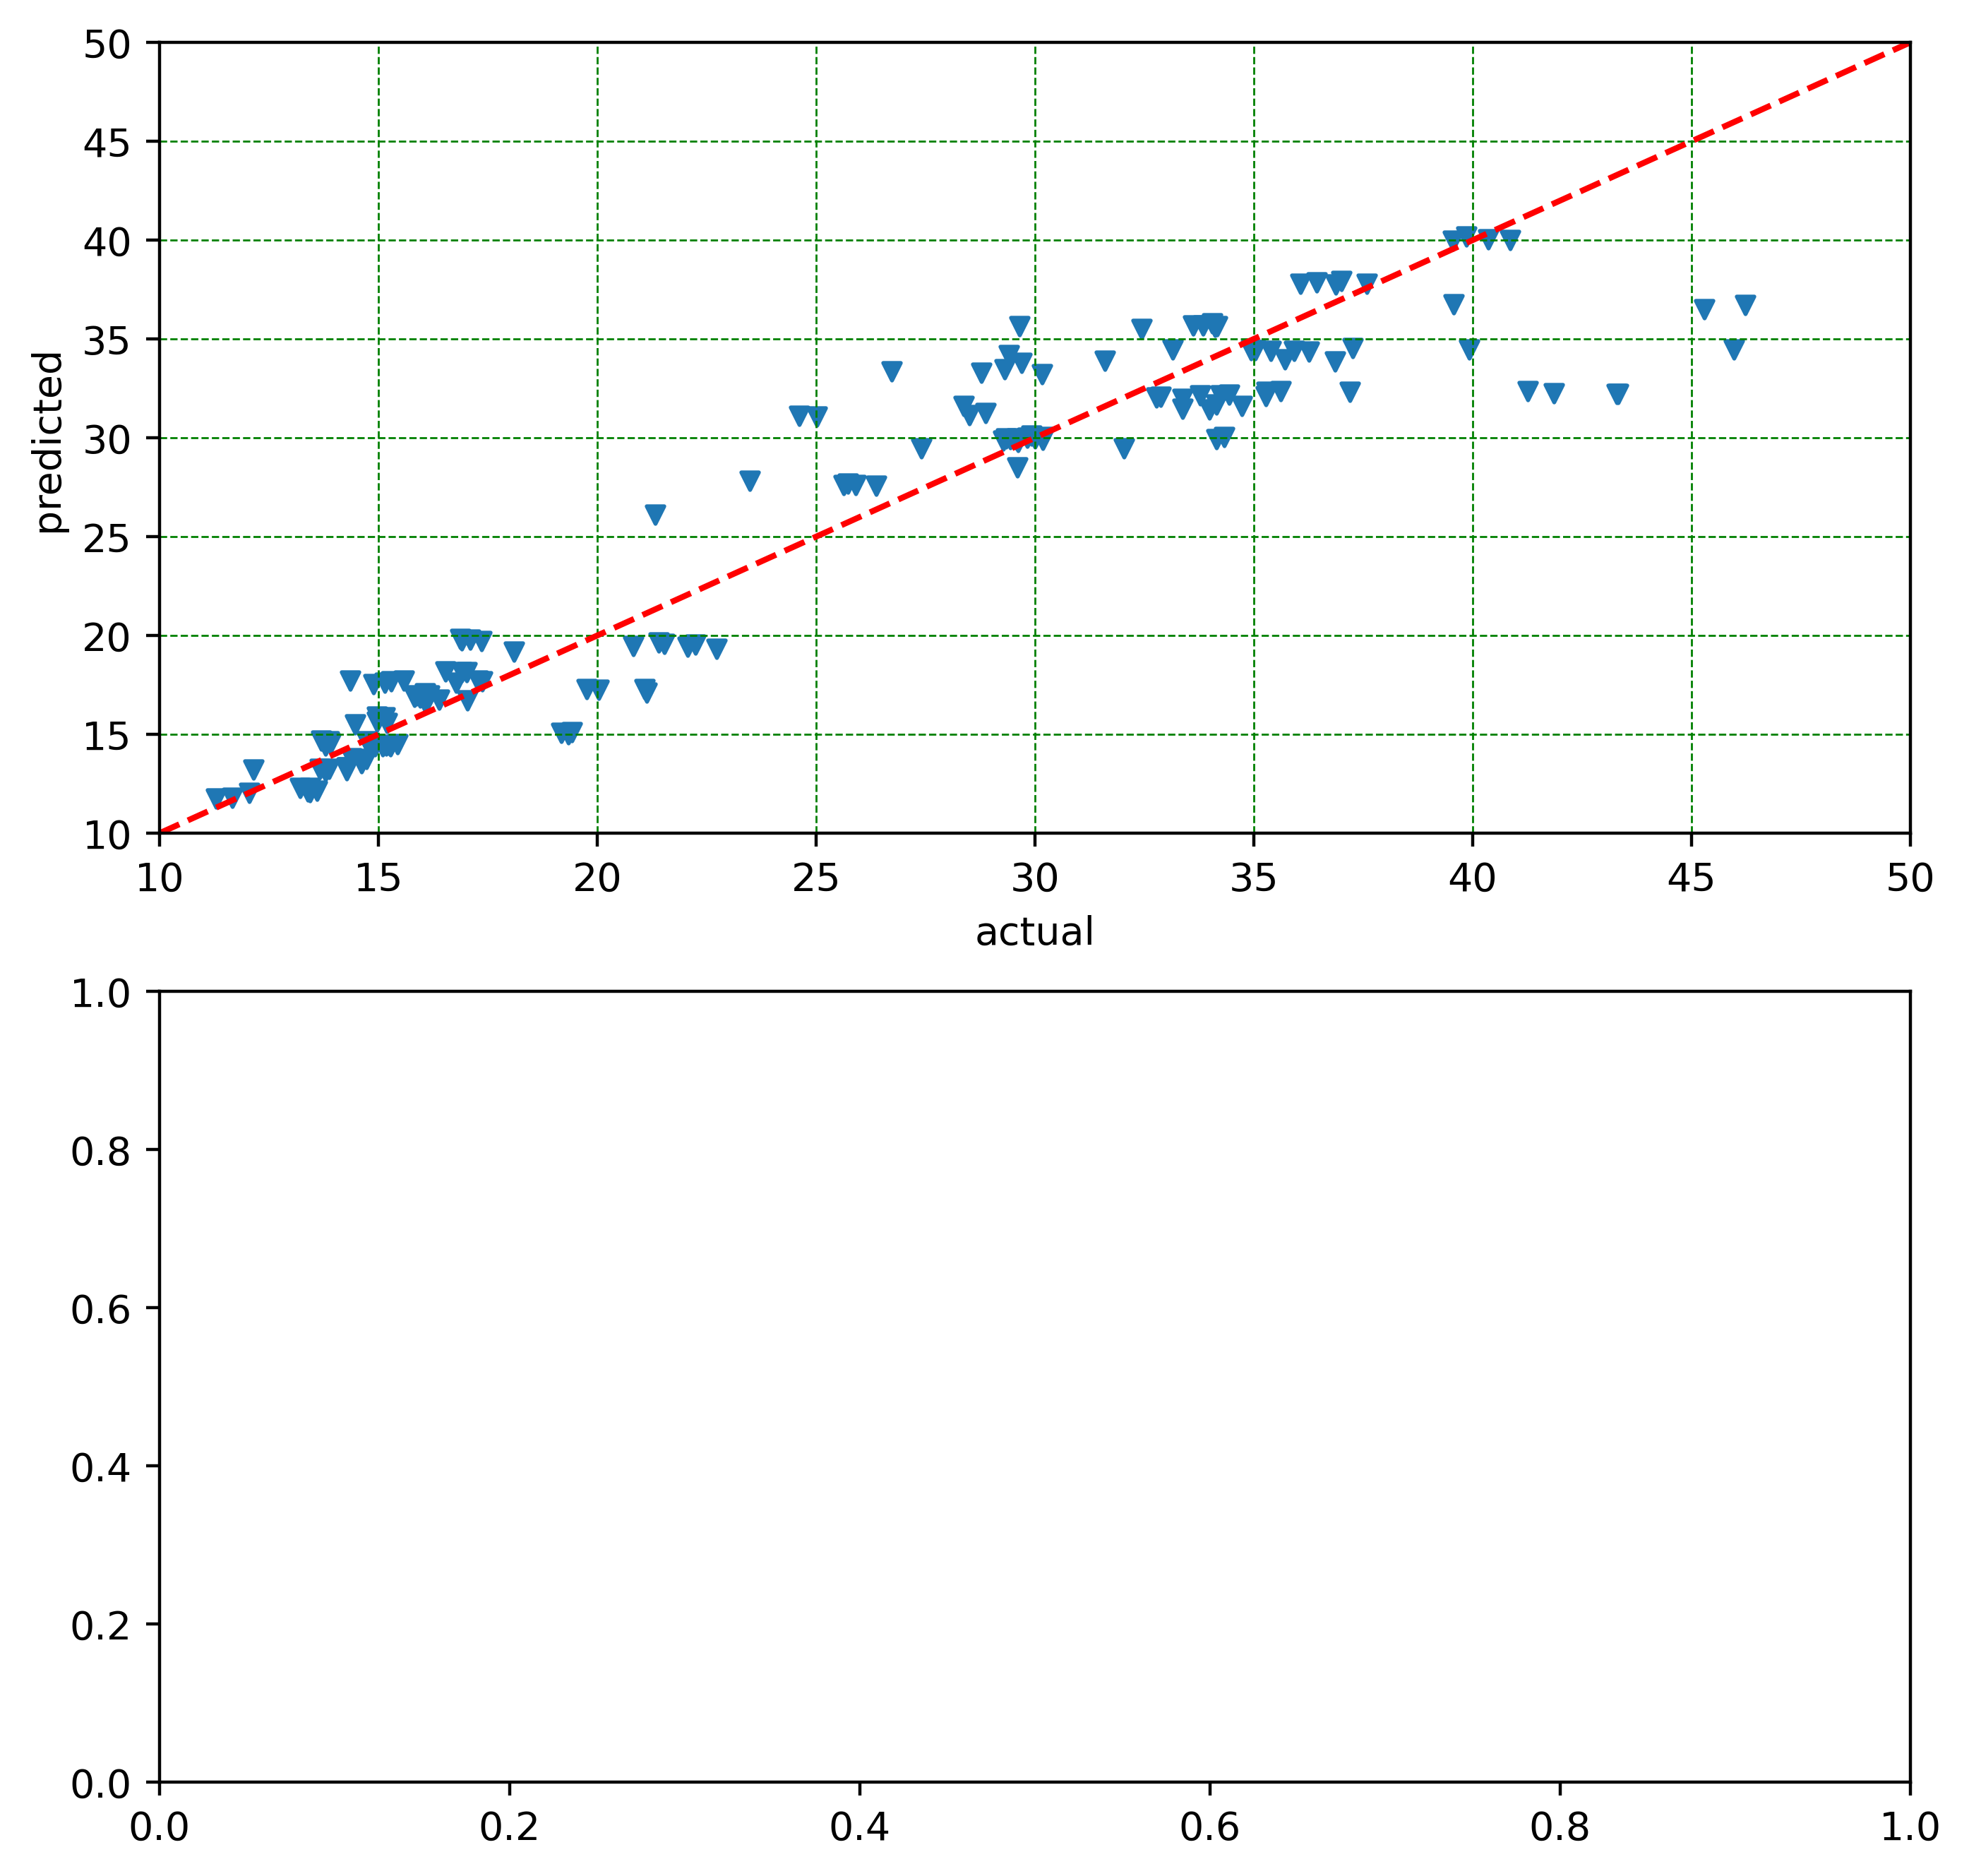

In [8]:
linreg = LinearRegression()
pred_model(linreg, "LinearRegression", X_train, y_train, X_test, y_test)

PolynomialRegression
R2 :  0.9545


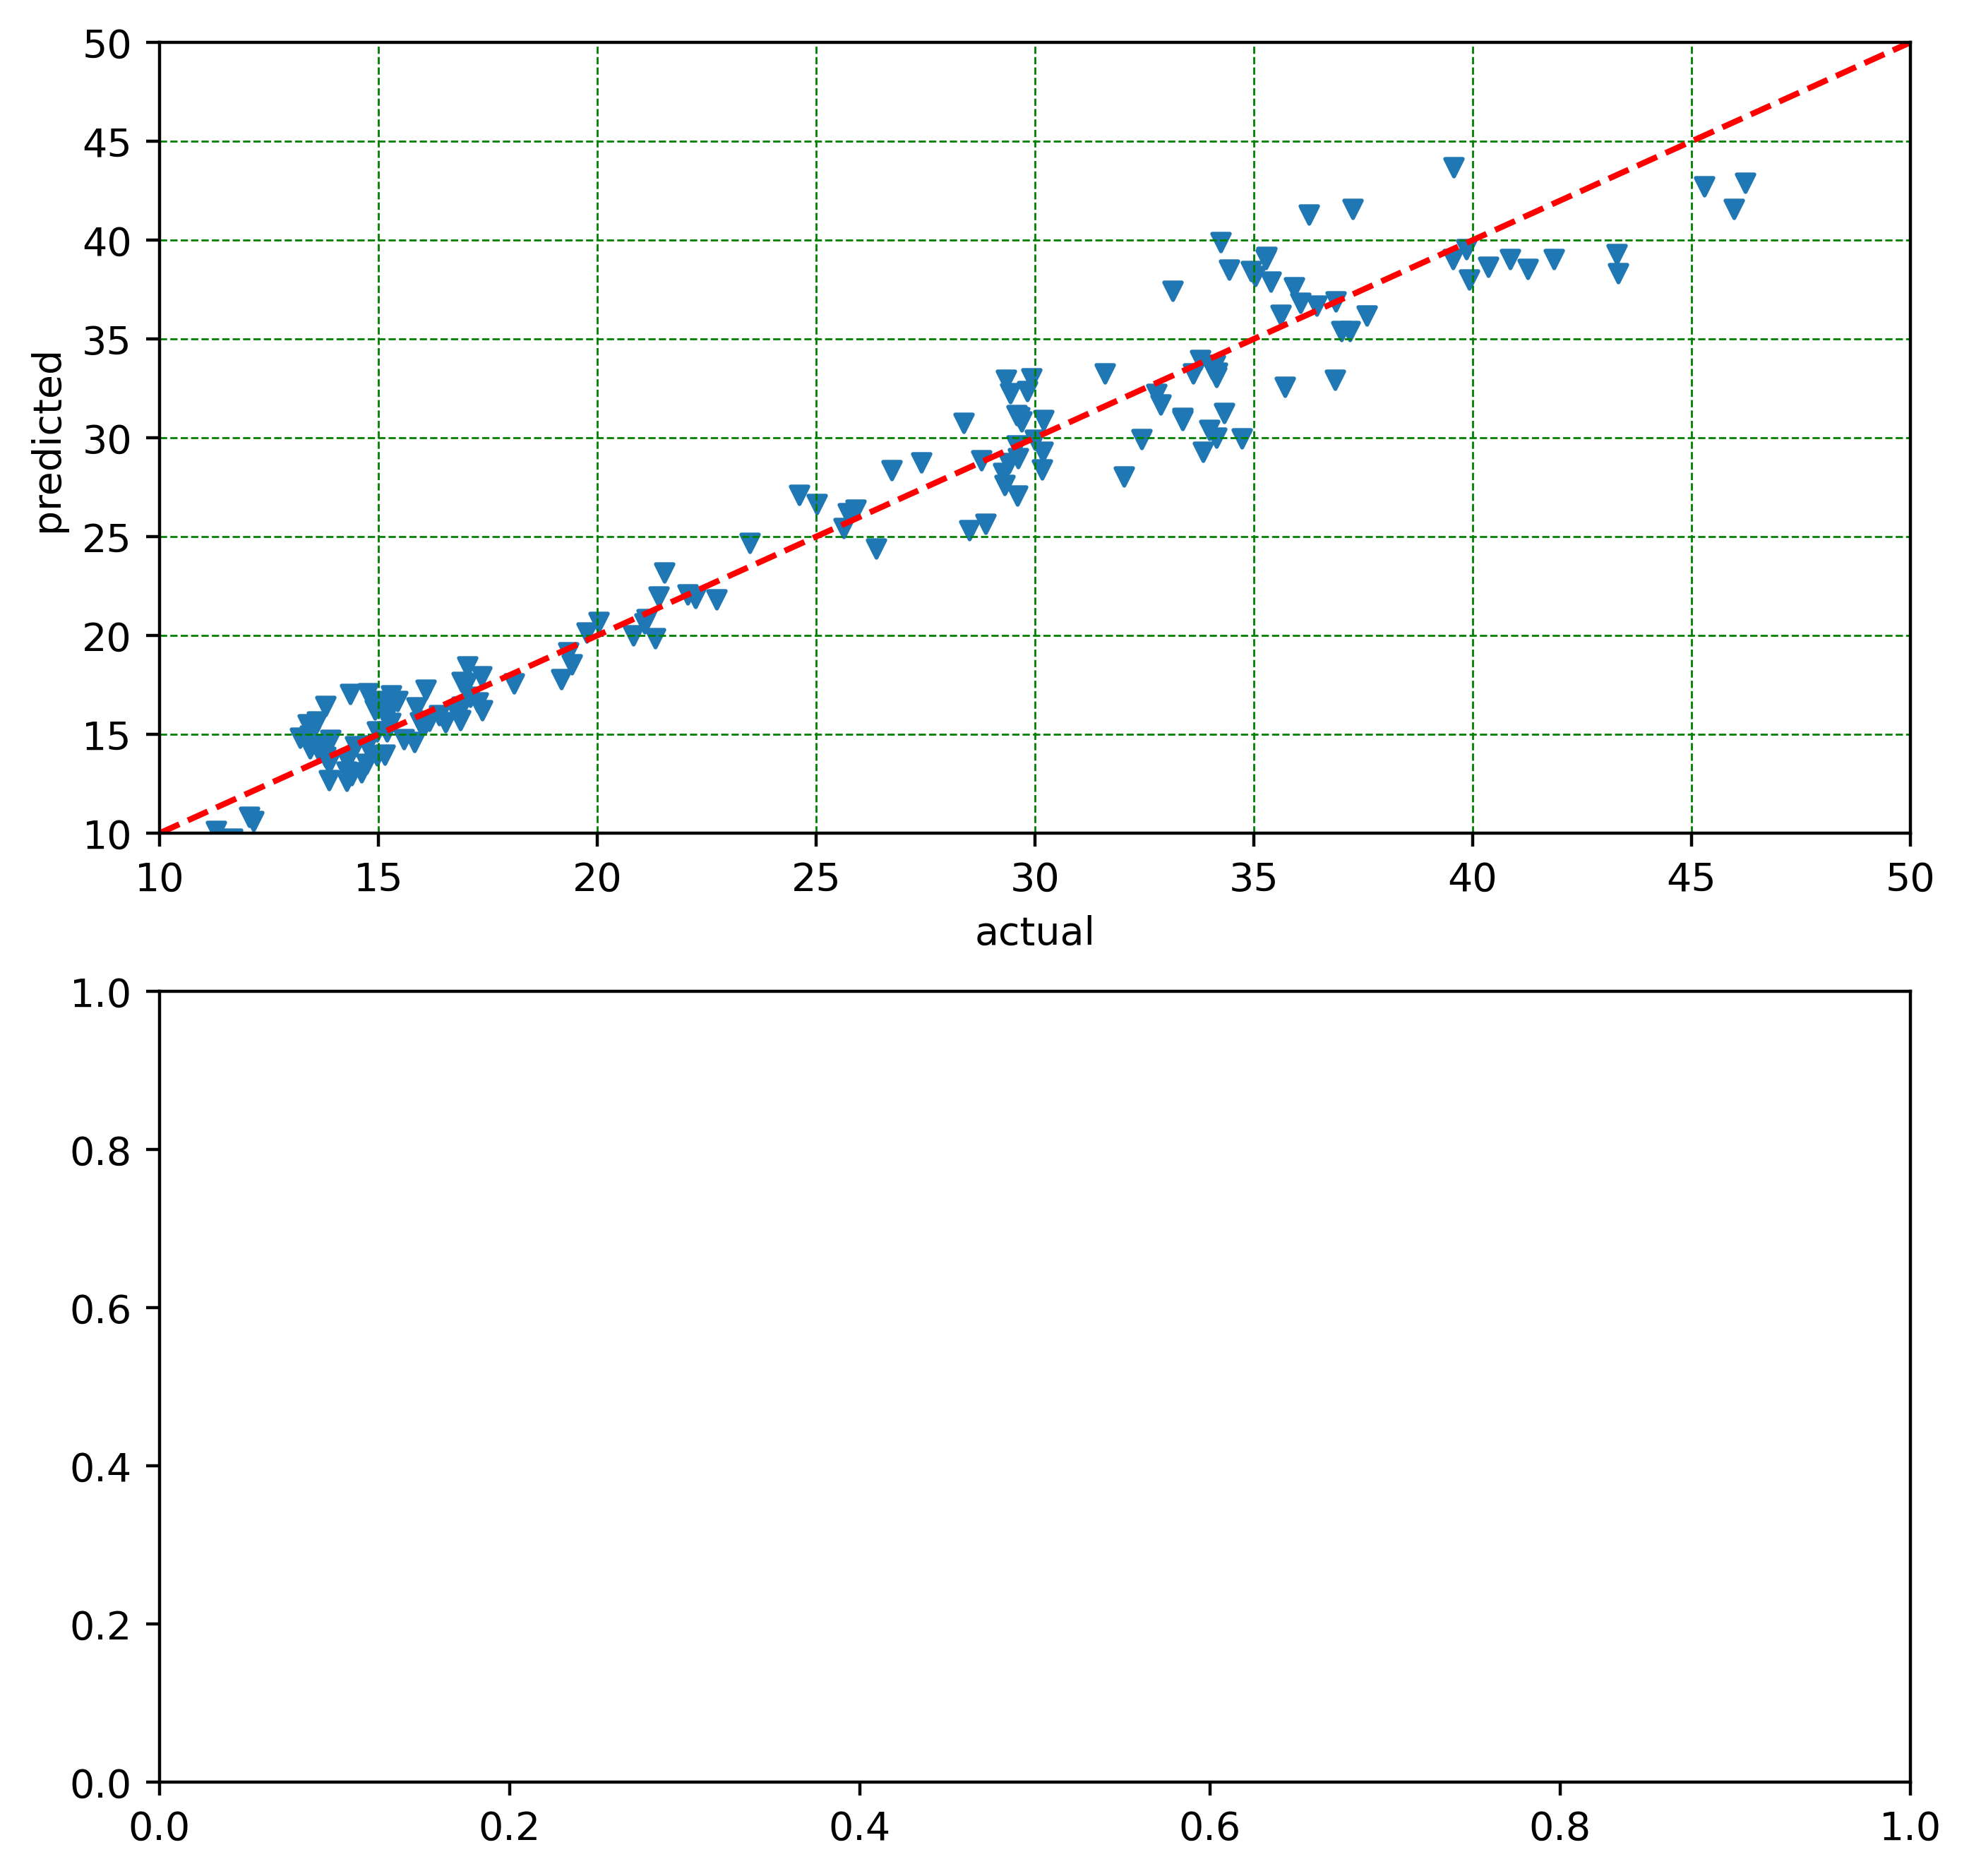

In [9]:
poly = PolynomialFeatures()
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

pred_model(linreg, "PolynomialRegression", X_train_poly, y_train, X_test_poly, y_test)